### Первое задание по методам оптимизации
Ермоленко Александр Андреевич

19.Б05-пу

#Подключение библиотек

In [93]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

#Определение и визуализация функции

In [94]:
eps = (1e-6) * 5

name = len('Александр')
surname = len('Ермоленко')

print(f"Функция, которую будем оптимизировать: -log({name}, x) + e^({surname} * x)")
data = dict.fromkeys(['passive_search', 'dichotomy', 'golden_ratio', 'fibonacci', 'tangents', 'Newton', 'secants' ])

Функция, которую будем оптимизировать: -log(9, x) + e^(9 * x)


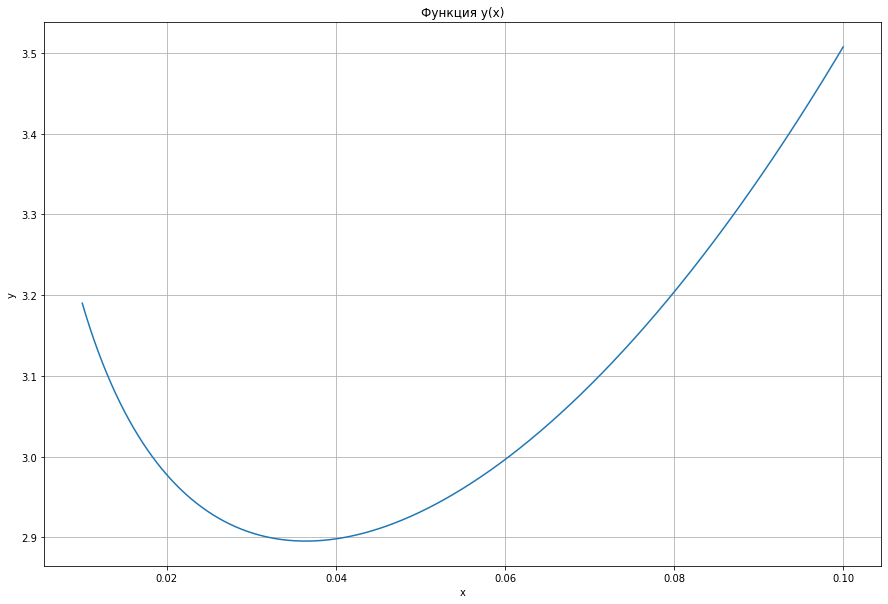

In [95]:
def function(x):
    if x != 0:
        y = -math.log(x, name) + math.exp(surname * x)
    else:
        y = np.inf
    return y


def first_derivative_function(x):
    if x != 0:
        y = surname * math.exp(surname * x) - 1 / (x * math.log(name))
    else:
        y = - np.inf
    return y


def second_derivative_function(x):
    if x != 0:
        y = surname ** 2 * math.exp(surname * x) + 1 / (x ** 2 * math.log(name))
    else:
        y = np.inf
    return y


def graphical_record():
    x = np.arange(1e-2, 0.1, 1e-5)

    # Параметры для создания области построения графика:
    graph = plt.figure(figsize=(15, 10))

    # Построение графика:
    plt.title("Функция y(x)")
    
    # Оси координат
    plt.xlabel("x")
    plt.ylabel("y")

    plt.grid() # сетка графика
    plt.plot(x, function(x))

function = np.vectorize(function)
graphical_record()




Далее условимся исследовать функцию на [0; 1]

# Метод пассивного поиска

In [96]:
def passive_search():
    #Зафиксируем время начала работы функции
    start_time = time.clock()

    #Поиск количества отрезков для получения необходимой точности
    a = 0
    b = 1
    quant = int((b - a) / eps)
    print(f"Для достижения необходимой точности в методе пассивного поиска нужно {quant} отрезков")

    #Поиск максимума и минимума для функции
    f_min = np.inf
    x_min = np.inf
    x = np.arange(a, b, (b - a) / quant)
    count_call = 0 #Подсчет количества вызовов функции
    for i in x:
        func = function(i)
        count_call += 1
        if func < f_min:
            f_min = func
            x_min = i

    print("x = {0} y = {1}".format('%.5f' % x_min, '%.3f' % f_min))

    end_time = time.clock()
    
    data['passive_search'] = (end_time - start_time) * 10**3
    return count_call


In [97]:
calls = []
method = passive_search()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

Для достижения необходимой точности в методе пассивного поиска нужно 200000 отрезков
x = 0.03643 y = 2.896
Было произведено 200000 вызовов функции


#Метод дихотомии

In [98]:
def dichotomy():
    start_time = time.clock()

    a = 0
    b = 1
    center = (b + a) / 2
    quant = 0
    count_call = 0

    while abs(b - a) > eps:
        print(a, b)
        center = (b + a) / 2
        if function(center + eps) > function(center - eps):
            b = center
        else:
            a = center
        quant += 1
        count_call += 2
    
    print(f"Для достижения необходимой точности в методе дихотомии нужно {quant} итераций")
    print("x = {0} y = {1}".format('%.5f' % center, '%.3f' % function(center)))

    end_time = time.clock()
    data['dichotomy'] = (end_time - start_time) * 10**3

    return count_call


In [99]:
calls = []
method = dichotomy()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

0 1
0 0.5
0 0.25
0 0.125
0 0.0625
0.03125 0.0625
0.03125 0.046875
0.03125 0.0390625
0.03515625 0.0390625
0.03515625 0.037109375
0.0361328125 0.037109375
0.0361328125 0.03662109375
0.036376953125 0.03662109375
0.036376953125 0.0364990234375
0.036376953125 0.03643798828125
0.036407470703125 0.03643798828125
0.0364227294921875 0.03643798828125
0.03643035888671875 0.03643798828125
Для достижения необходимой точности в методе дихотомии нужно 18 итераций
x = 0.03643 y = 2.896
Было произведено 36 вызовов функции


#Метод золотого сечения

In [100]:
def golden_ratio():
    a = 0
    b = 1
    count = 0
    tetta = (math.sqrt(5) - 1) / 2

    start_time = time.clock()
    c = b - (b - a) * tetta
    d = a + (b - a) * tetta
    f_c = function(c)
    f_d = function(d)
    count_call = 2
    while abs(b - a) > 2 * eps:
        print(a, b)
        if f_c < f_d:
            b = d
            d = c
            c = b - (b - a) * tetta
            f_d = f_c
            f_c = function(c)
        else:
            a = c
            c = d
            d = a + (b - a) * tetta
            f_c = f_d
            f_d = function(d)
        count_call += 1
        count += 1

    print(f"Для достижения необходимой точности в методе золотого сечения нужно {count} итераций")
    print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % function(c)))

    end_time = time.clock()
    
    data['golden_ratio'] =  (end_time - start_time) * 10**3
    return count_call

In [101]:
calls = []
method = golden_ratio()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

0 1
0 0.6180339887498949
0 0.3819660112501051
0 0.2360679774997897
0 0.1458980337503154
0 0.09016994374947424
0 0.05572809000084118
0.02128623625220817 0.05572809000084118
0.02128623625220817 0.042572472504416356
0.029416855007991516 0.042572472504416356
0.03444185374863302 0.042572472504416356
0.03444185374863302 0.0394668524892745
0.03444185374863302 0.03754747376377487
0.03562809503827524 0.03754747376377487
0.03562809503827524 0.03681433632791747
0.036081198892060067 0.03681433632791747
0.036081198892060067 0.036534302745844884
0.03625426916377231 0.036534302745844884
0.03636123247413264 0.036534302745844884
0.03636123247413264 0.036468195784492986
0.03640208882314109 0.036468195784492986
0.03640208882314109 0.036442945172149535
0.03641769455980609 0.036442945172149535
0.03642733943548454 0.036442945172149535
Для достижения необходимой точности в методе золотого сечения нужно 24 итераций
x = 0.03643 y = 2.896
Было произведено 26 вызовов функции


#Метод Фибоначчи

In [102]:
def Fibonacci():
    def fibonacci(max, f=1, s=1):
        while f < max:
            yield f
            f, s = s, f + s

    fib_num = []
    count = -2
    a = 0
    b = 1
    for f in fibonacci((b - a) / eps):
        fib_num.append(f)
        count += 1 
        
    start_time = time.clock()

    i = 1
    c = a + (b - a) * fib_num[count - 1] / fib_num[count + 1]
    d = a + (b - a) * fib_num[count] / fib_num[count + 1]
    f_c = function(c)
    f_d = function(d)
    count_call = 2
    for i in range(2, count):
        print(a, b)
        if f_c < f_d:
            b = d
            d = c
            c = a + (b - a) * fib_num[count - i] / fib_num[count + 2 - i]
            f_d = f_c
            f_c = function(c)
        else:
            a = c
            c = d
            d = a + (b - a) * fib_num[count + 1 - i] / fib_num[count + 2 - i]
            f_c = f_d
            f_d = function(d)
        count_call += 1

    print(f"Для достижения необходимой точности в методе Фибоначчи нужно {count} итераций")
    print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % function(c)))

    end_time = time.clock()
    
    data['fibonacci'] = (end_time - start_time) * 10**3
    return count_call

In [103]:
calls = []
method = Fibonacci()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

0 1
0 0.618033988738303
0 0.381966011261697
0 0.236067977476606
0 0.14589803378509097
0 0.09016994369151501
0 0.05572809009357594
0.021286236495636855 0.05572809009357594
0.021286236495636855 0.0425724729912737
0.029416855888971475 0.0425724729912737
0.03444185359793908 0.0425724729912737
0.03444185359793908 0.03946685130690669
0.03444185359793908 0.03754747528230609
0.0356280992577055 0.03754747528230609
0.0356280992577055 0.03681434491747192
0.036081214552637735 0.03681434491747192
0.036081214552637735 0.03653432984756997
0.03625431477766803 0.03653432984756997
0.03636122962253968 0.03653432984756997
0.03636122962253968 0.03646814446741133
0.03640195908725269 0.03646814446741133
0.03640195908725269 0.0364426885519657
0.03641723263652007 0.0364426885519657
Для достижения необходимой точности в методе Фибоначчи нужно 25 итераций
x = 0.03643 y = 2.896
Было произведено 25 вызовов функции


#Метод касательных

In [104]:
def tangents():
    start_time = time.clock()

    a = 1.e-3
    b = 0.25
    count = 0
    
    f_a = function(a)
    f_b = function(b)
    df_a = first_derivative_function(a)
    df_b = first_derivative_function(b)
    count_call = 2

    while abs(b - a) > eps:
        print(a, b)
        c = (f_b - f_a + df_a * a - df_b * b) / (df_a - df_b)
        df_c = first_derivative_function(c)
        if df_c > 0:
            b = c
            df_b = df_c
            f_b = function(c)
        elif df_c < 0:
            a = c
            df_a = df_c
            f_a = function(c)
        else: 
            break
        count += 1
        count_call += 2

    print(f"Для достижения необходимой точности в методе касательных нужно {count} итераций")
    print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % function(c)))
    end_time = time.clock()

    data['tangents'] = (end_time - start_time) * 10**3
    return count_call


In [105]:
calls = []
method = tangents()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

0.001 0.25
0.029026321097011403 0.25
0.029026321097011403 0.15759106952358104
0.029026321097011403 0.09031731083295613
0.029026321097011403 0.054776362705682785
0.029026321097011403 0.04014411127183532
0.03413906328201358 0.04014411127183532
0.03413906328201358 0.03702761365171704
0.03555497444742557 0.03702761365171704
0.036284174544794795 0.03702761365171704
0.036284174544794795 0.03665411166313199
0.036284174544794795 0.0364686977674354
0.03637632486011187 0.0364686977674354
0.036422483484812286 0.0364686977674354
0.036422483484812286 0.036445583668280844
0.036422483484812286 0.036434031837155954
0.036428257226203214 0.036434031837155954
Для достижения необходимой точности в методе касательных нужно 17 итераций
x = 0.03643 y = 2.896
Было произведено 36 вызовов функции


#Метод Ньютона-Рафсона

In [106]:
def Newton():
    start_time = time.clock()

    c = 1.e-4
    c_prev = np.inf
    count = 0   
    df_c = first_derivative_function(c)
    count_call = 1

    while abs(c - c_prev) > eps:
        print(c)
        c_prev, c = c, c - df_c / second_derivative_function(c)
        df_c = first_derivative_function(c)
        count_call += 2
        count += 1

    print(f"Для достижения необходимой точности в методе Ньютона-Рафсона нужно {count} итераций")
    print("x = {0} y = {1}".format('%.5f' % c, '%.3f' % function(c)))

    end_time = time.clock()
    
    data['Newton'] = (end_time - start_time) * 10**3
    return count_call

In [107]:
calls = []
method = Newton()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

0.0001
0.00019980189395019267
0.0003988115159545031
0.0007944552531714056
0.001576251309447265
0.0031019839527259034
0.006003190468758856
0.011218849759902613
0.01947962740318384
0.029232733255712955
0.035283727395548026
0.03640564808620327
0.03643199145758254
Для достижения необходимой точности в методе Ньютона-Рафсона нужно 13 итераций
x = 0.03643 y = 2.896
Было произведено 27 вызовов функции


#Метод секущих

In [108]:
def secants():
    start_time = time.clock()

    a = 1.e-3
    b = 5 * 1.e-3

    count = 0
    df_a = first_derivative_function(a)
    df_b = first_derivative_function(b)
    count_call = 2

    while abs(b - a) > eps:
        print(a, b)
        a, b = b, b - (b - a) / (df_b - df_a) * df_b
        df_a = df_b
        df_b = first_derivative_function(b)
        count_call += 1
        count += 1
        
    print(f"Для достижения необходимой точности в методе секущих нужно {count} итераций")
    print("x = {0} y = {1}".format('%.5f' % a, '%.3f' % function(a)))

    end_time = time.clock()

    data['secants'] = (end_time - start_time) * 10**3
    return count_call

In [109]:
calls = []
method = secants()
calls.append(method)
print(f"Было произведено {method} вызовов функции")

0.001 0.005
0.005 0.005895754914341823
0.005895754914341823 0.010257012922755646
0.010257012922755646 0.014788812733260407
0.014788812733260407 0.02141877445874834
0.02141877445874834 0.02816432282686827
0.02816432282686827 0.03349662693161964
0.03349662693161964 0.03590686161177118
0.03590686161177118 0.036400847973944876
0.036400847973944876 0.036431683305228585
Для достижения необходимой точности в методе секущих нужно 10 итераций
x = 0.03643 y = 2.896
Было произведено 12 вызовов функции


#Итоги

In [110]:
data

{'Newton': 0.6510000000048421,
 'dichotomy': 3.6509999999978504,
 'fibonacci': 3.591999999997597,
 'golden_ratio': 5.687999999999249,
 'passive_search': 3076.5059999999985,
 'secants': 1.2900000000044543,
 'tangents': 2.4370000000004666}

Лучшую эффективность по времени показывают следующие методы: Ньютона-Рафсона и секущих